<a href="https://colab.research.google.com/github/dvisionst/Neural_Network_Core/blob/main/Neural_Network_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks Core

- Jose Flores
- 9/1/2022

In [57]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from keras.layers import Dropout



In [3]:
# Using function from lesson plan week three 'Regression Models in Keras'
# url: https://login.codingdojo.com/m/214/7186/89973


#  You can use this function to see how your model improves over time
def plot_history(history, metrics=None):
  plt.plot(history.history['loss'], label='training')
  plt.plot(history.history['val_loss'], label='testing')
  plt.title('Loss')
  plt.legend()
  plt.show()
  if metrics:
    for metric in metrics:
      plt.plot(history.history[metric], label=f'training {metric}')
      plt.plot(history.history[f'val_{metric}'], label=f'testing {metric}')
      plt.legend()
      plt.title(metric)
      plt.show()


In [4]:
# importing the data

df = pd.read_csv('/content/train.csv')
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Looking at general info of the df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Looking at the shape of the date to see how many rows and columns there are.
df.shape

(1460, 81)

In [7]:
# Checking for duplicates

df.duplicated().sum()

0

In [23]:
# Checking for missing values
obj_list = []
for column in df:
  if df[column].isna().sum() > 0 and df[column].dtypes == 'object':
    print(column, df[column].isna().sum())
    obj_list.append(column)
     


Alley 1369
MasVnrType 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [25]:
for value in obj_list:
  print(df[value].value_counts(), "\n\n")

Grvl    50
Pave    41
Name: Alley, dtype: int64 


None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64 


TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64 


TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64 


No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64 


Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64 


Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64 


SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64 


Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64 


Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64 


Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64 


TA    1311
Fa      48
Gd      14
Ex    

In [32]:
fill = df['BsmtQual'].isna()
dfa = df[fill]
dfa['BsmtQual'].head()

17     NaN
39     NaN
90     NaN
102    NaN
156    NaN
Name: BsmtQual, dtype: object

In [33]:
df['Alley'].replace({'Grvl':2, 'Pave':1, np.NaN:0}, inplace=True)

df['BsmtQual'].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.NaN:0},
                       inplace=True)
df['BsmtCond'].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.NaN:0}, 
                       inplace=True)

df['BsmtExposure'].replace({'Gd':4, 'Av':3, 'Mn':2, 'No':1, np.NaN:0}, 
                           inplace=True)
df['BsmtFinType1'].replace({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'Lwq':2,
                            'Unf':1, np.NaN:0}, inplace=True)
df['BsmtFinType2'].replace({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'Lwq':2,
                            'Unf':1, np.NaN:0}, inplace=True)

df['FireplaceQu'].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.NaN:0}, 
                       inplace=True)
df['PoolQC'].replace({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, np.NaN:0}, inplace=True)


In [34]:
# Creating my features matrix along with my target vector
y = df['SalePrice']

X = df.drop(columns=['SalePrice', 'MiscFeature', 'Fence'], inplace=True)

In [11]:
# Creating training and test data sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [37]:
# Creating a scaler to scale data
scaler = StandardScaler()

# Creating column selectors and imputers
num_sel = make_column_selector(dtype_include='number')
cat_sel =make_column_selector(dtype_include='object')

# Creating imputers
missing = SimpleImputer(strategy='most_frequent')
zero = SimpleImputer(strategy='mean')

# Creating one hot encoder for categorical data
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)


In [38]:
# instantiating numeric and categorical tuples
cat_pipe = make_pipeline(missing, ohe)
num_pipe = make_pipeline(zero, scaler)
num_tup = (num_pipe, num_sel)
cat_tup = (cat_pipe, cat_sel)

preprocessor = make_column_transformer(num_tup, cat_tup, remainder='passthrough')


In [39]:
# Fitting the preprocessor on the training data
preprocessor.fit(X_train, y_train)
# Creating X_trained and X_test processed
X_train_proc = preprocessor.transform(X_train)
X_test_proc = preprocessor.transform(X_test)
# taking a look of the shape of processed X_trian
X_train_proc.shape


(1095, 285)

In [44]:
# Creating the model and starting with the input dimensions being the number 
# of columns in the processed X_train

input_dim = X_train_proc.shape[1]

# Instantiating regression model 
reg_model = Sequential()

# Creating model with two hidden layers, ten nodes and the output layer
reg_model.add(Dense(5, input_dim=input_dim, activation='relu'))
reg_model.add(Dense(5, activation='relu'))
reg_model.add(Dense(1, activation='linear'))



In [45]:
# Compiling the model with metrics

reg_model.compile(loss='mse', optimizer='adam', 
                  metrics=['acc'])

In [53]:
# fitting the model and saving the history

history = reg_model.fit(X_train_proc, y_train,
                        validation_data = (X_test_proc, y_test),
                        epochs=300,
                        verbose=0)


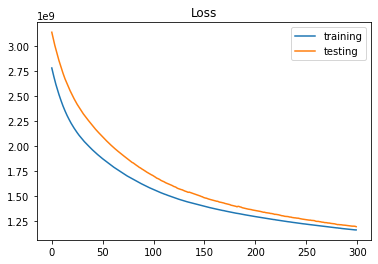

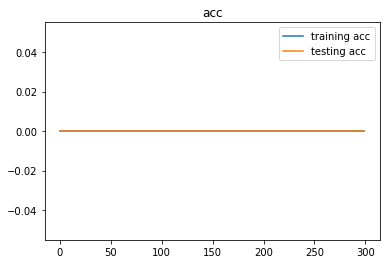

In [56]:
# plotting the history

plot_history(history, ['acc'])

In [60]:
reg_model2 = Sequential()

# Creating model with two hidden layers, ten nodes and the output layer
reg_model2.add(Dense(20, input_dim=input_dim, activation='relu'))
reg_model2.add(Dropout(.15))
reg_model2.add(Dense(20, activation='relu'))
reg_model2.add(Dropout(.15))
reg_model2.add(Dense(1, activation='linear'))

# fitting the model and saving the history
history = reg_model.fit(X_train_proc, y_train,
                        validation_data = (X_test_proc, y_test),
                        epochs=300,
                        verbose=0)

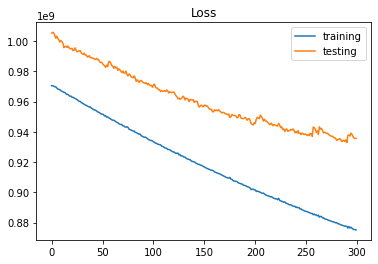

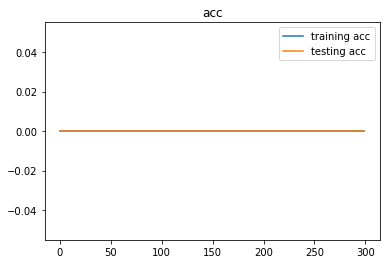

In [61]:
# plotting the history

plot_history(history, ['acc'])